In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

C:\Users\Ashwath\anaconda3\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [2]:
df = pd.read_csv("Chennai_1990_2022_Madras.csv")
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,25.2,22.8,28.4,0.5
1,02-01-1990,24.9,21.7,29.1,0.0
2,03-01-1990,25.6,21.4,29.8,0.0
3,04-01-1990,25.7,NaN,28.7,0.0
4,05-01-1990,25.5,20.7,28.4,0.0


In [3]:
df.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [ ]:
df['time'] = pd.to_datetime(df['time'])

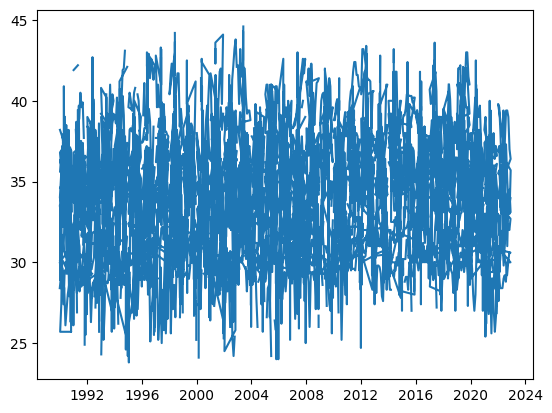

In [14]:
plt.plot(df['time'],df['tmax'])
plt.show()

In [15]:
data = df[['time','tmax']]
data.dropna(inplace=True)
data.columns = ('ds','y')
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Ashwath\AppData\Local\Temp\ipykernel_21040\2911337401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,1990-01-01,28.4
1,1990-02-01,29.1
2,1990-03-01,29.8
3,1990-04-01,28.7
4,1990-05-01,28.4


In [16]:
m = NeuralProphet()
m.fit(data, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 92.423% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (170) is too small than the required number for the learning rate finder (251). The results might not be optimal.


Finding best initial lr:   0%|          | 0/251 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,26.685076,29.715683,0.957152,0.0,0
1,24.159748,26.984104,0.832486,0.0,1
2,21.651163,24.257750,0.709238,0.0,2
3,19.146414,21.500175,0.587957,0.0,3
4,16.664412,18.720871,0.469594,0.0,4
...,...,...,...,...,...
995,2.212990,2.870017,0.012487,0.0,995
996,2.213045,2.868312,0.012487,0.0,996
997,2.213237,2.871792,0.012489,0.0,997
998,2.213108,2.871596,0.012488,0.0,998


In [24]:
future = m.make_future_dataframe(data,periods=258)
forecast = m.predict(future)
forecast.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 53.811% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.612% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 170it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
253,2023-08-18,None,33.812347,33.241203,0.566738,0.004406
254,2023-08-19,None,33.790932,33.240784,0.551185,-0.001036
255,2023-08-20,None,33.753059,33.240364,0.537106,-0.024410
256,2023-08-21,None,33.788815,33.239944,0.524552,0.024319
257,2023-08-22,None,33.735748,33.239525,0.513560,-0.017332
